## Import Required Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

## Load the Dataset

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

## Prepare the Data

In [6]:
X = data.drop('quality', axis=1)  # features
y = data['quality'].apply(lambda x: 1 if x > 6 else 0) # Turn it into a binary classification problem (good/bad wine)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Build the Decision Tree Model

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Perform Grid Search

In [10]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a StratifiedKFold object to maintain ratio of classes in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=1)

## Evaluate the Model

In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(best_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy: 0.86
Test set score: 0.92
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       277
           1       0.72      0.67      0.70        43

    accuracy                           0.92       320
   macro avg       0.84      0.82      0.83       320
weighted avg       0.92      0.92      0.92       320



## Visualize the Decision Tree

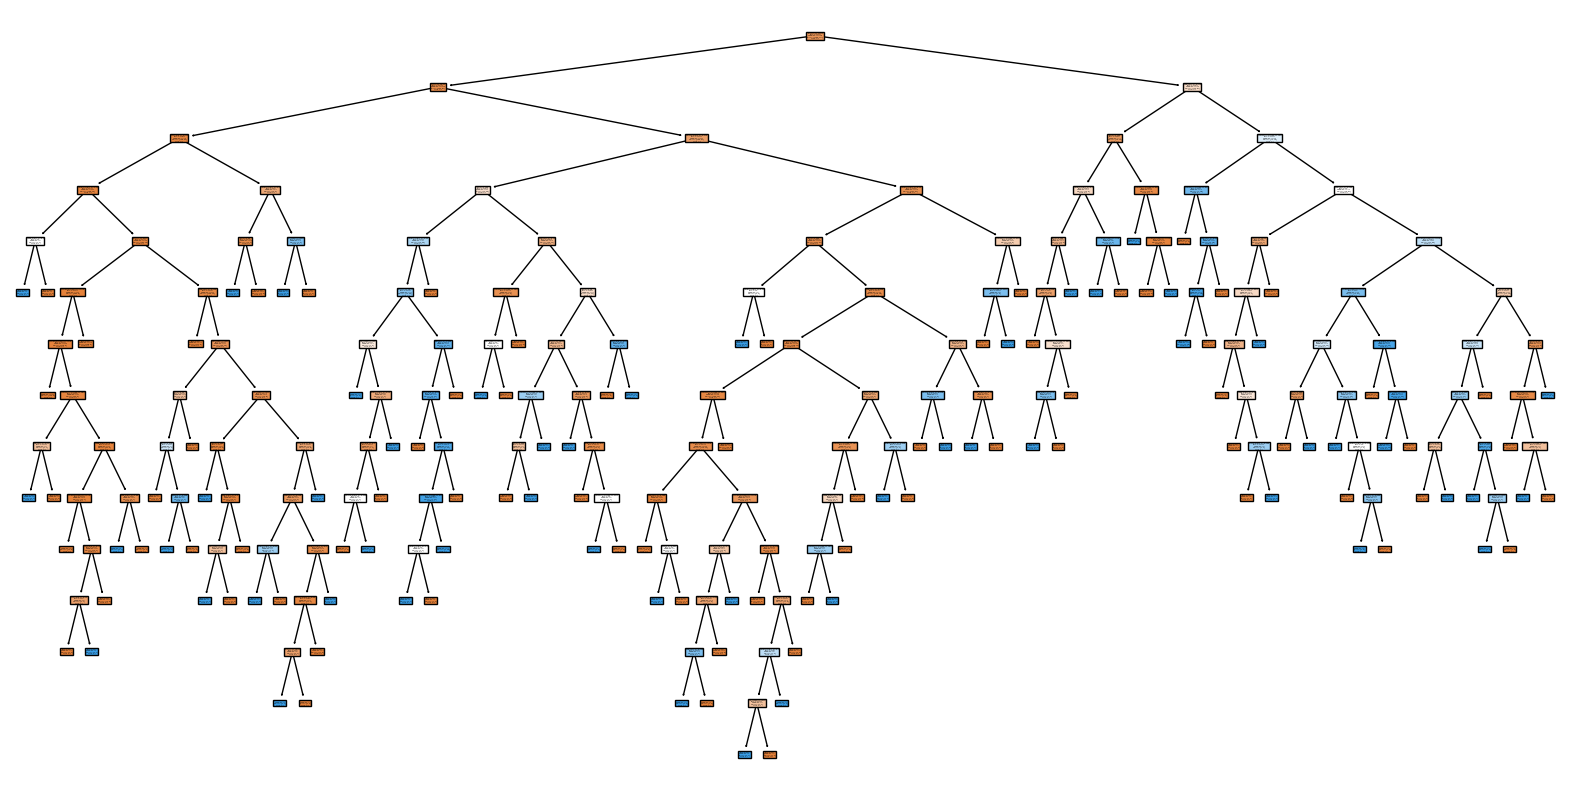

In [14]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=list(X.columns), class_names=[str(cls) for cls in model.classes_])
plt.show()